In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread('DATA/horse.jpg') # orignal image
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) # converted image

rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

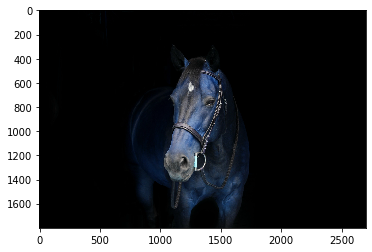

In [3]:
plt.imshow(dark_horse)

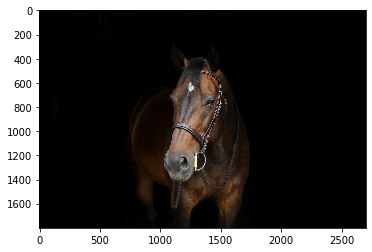

In [4]:
plt.imshow(show_horse)

### OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

In [5]:
# channels=[0] means we want blue color in open cv the BGR not RGB so we want B the blue color
hist_value = cv2.calcHist([blue_bricks],channels=[0], mask=None, histSize=[256], ranges=[0,256])

In [6]:
hist_value.shape

(256, 1)

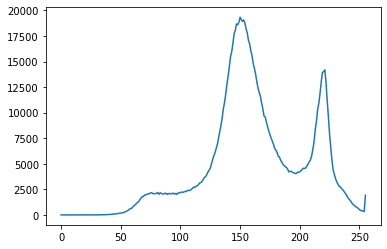

In [7]:
plt.plot(hist_value)

In [8]:
hist_value = cv2.calcHist([dark_horse],channels=[0], mask=None, histSize=[256], ranges=[0,256])

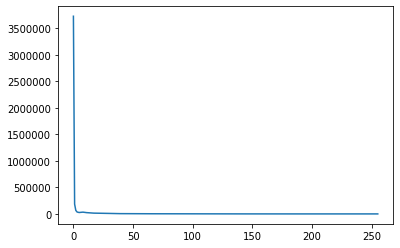

In [9]:
plt.plot(hist_value)

In [10]:
img = blue_bricks

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

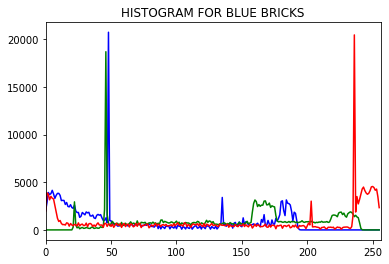

In [32]:
color = ('b','g','r')

for i,col in enumerate(color):
    hist_value = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist_value,color=col)
    plt.xlim([0,256])
    
plt.title('HISTOGRAM FOR BLUE BRICKS')

In [12]:
rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [13]:
img =rainbow

In [14]:
img.shape

(550, 413, 3)

In [15]:
# creating mask

In [16]:
mask = np.zeros(img.shape[:2],np.uint8)

In [17]:

mask[300:400,100:400] = 255

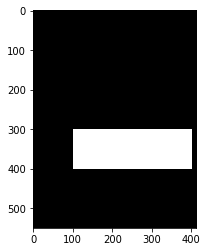

In [18]:
plt.imshow(mask,cmap='gray')

In [19]:
#masking with rainbow image

In [20]:
masked_img = cv2.bitwise_and(img,img,mask=mask)

In [21]:
show_masked_img = cv2.bitwise_and(masked_img,masked_img,mask=mask)

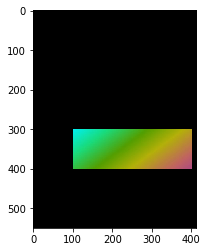

In [22]:
plt.imshow(show_masked_img)

In [28]:
hist_mask_val_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])

In [29]:
hist_val_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'red histogram for masked area')

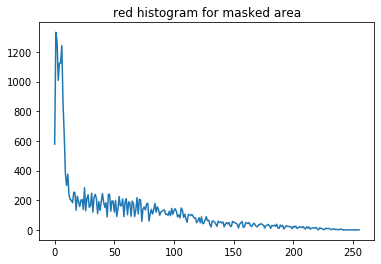

In [33]:
plt.plot(hist_mask_val_red)
plt.title('red histogram for masked area')

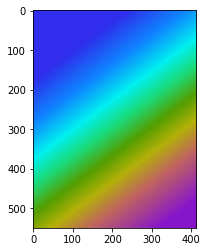

In [34]:
plt.imshow(rainbow)

Text(0.5, 1.0, 'red histogram for normal image')

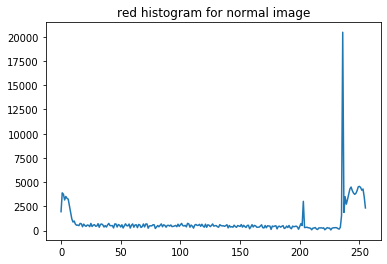

In [37]:
plt.plot(hist_val_red)
plt.title('red histogram for normal image')

In [45]:
gorilla = cv2.imread("DATA/gorilla.jpg",0) # 0 means gray scale

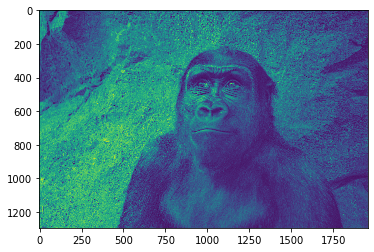

In [46]:
plt.imshow(gorilla)

In [47]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

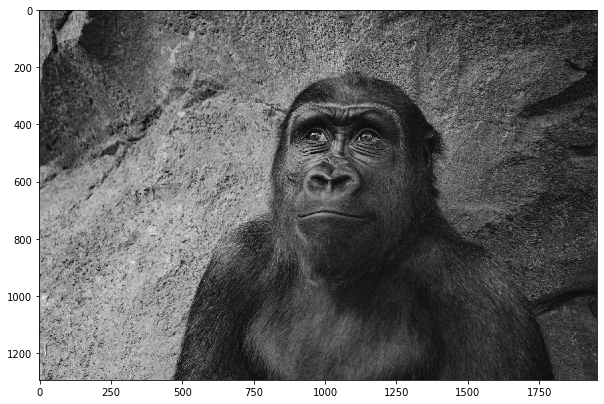

In [48]:
display(gorilla,cmap='gray')

In [49]:
gorilla.shape

(1295, 1955)

In [52]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256]) 
#NOTE:- don't write gorilla as it is wite in [gorilla] thi way si we can fin d the better plot

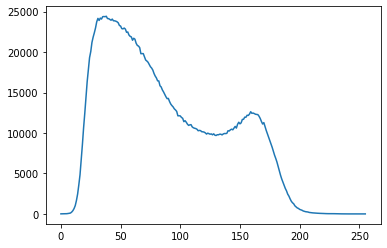

In [53]:
plt.plot(hist_values)

In [54]:
# equalizing the gorilla
eq_gorilla = cv2.equalizeHist(gorilla)

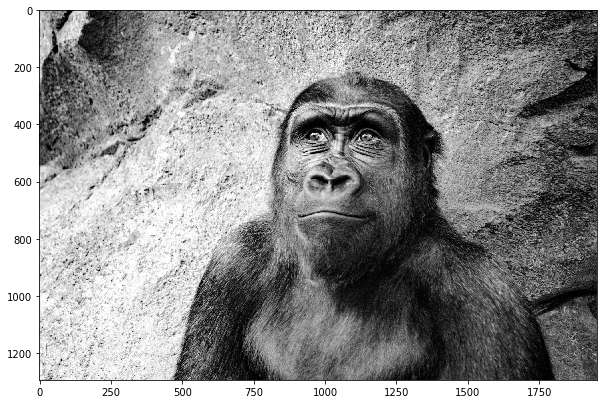

In [55]:
display(eq_gorilla,cmap='gray')

In [56]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256]) 

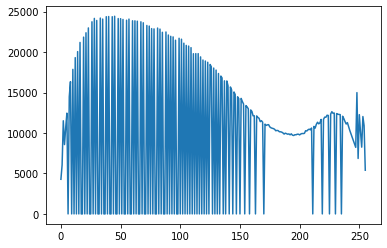

In [57]:
plt.plot(hist_values)

In [58]:
color_gorilla = cv2.imread('DATA/gorilla.jpg')

In [59]:
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)

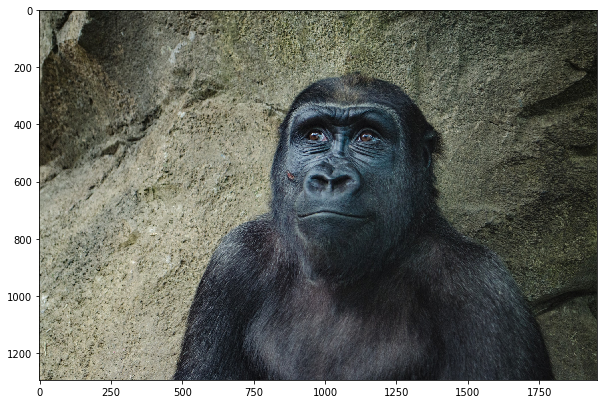

In [60]:
display(show_gorilla)

# hue type gorilla

if we want to equalize(increase the contrast) the histogram of a color image so open cv works that way first convert image into hsv then we can equalize the image

In [63]:
hsv =  cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

In [65]:
hsv[:,:,2].max()

255

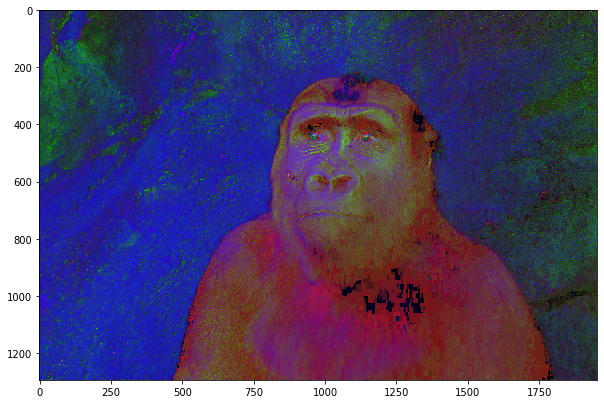

In [62]:
display(hsv)

In [66]:
# equalize the value channel

In [67]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [68]:
#convert hsv color into rgb

In [69]:
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

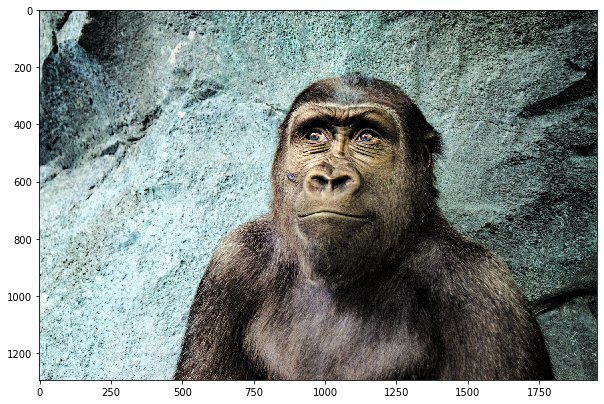

In [70]:
display(eq_color_gorilla)